In [21]:


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

#from xgboost import XGBRegressor

In [22]:
mainDF = pd.read_csv('proH&AData.csv')
mainDF.columns.tolist()
#drop null values
mainDF = mainDF.dropna()

In [23]:
X = mainDF[['Year', 'Round', 'MaxTemp', 'MinTemp', 'Rainfall', 'Venue', 'HomeTeam', 'AwayTeam', 'Day', 'homePosition', 'homePoints', 'MinutesSinceMidnight','homePercentage', 'awayPosition']]
Y = mainDF['Attendance']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=42)

In [25]:
#Normalise Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [27]:
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 51556775.8406184
Mean Absolute Error: 5428.939375969126
R-squared: 0.8035477739466239


In [29]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results

,Actual,Predicted
234,53014,42861.728511
1580,22859,32134.157749
487,15862,19890.148037
806,24552,23471.869166
1244,46095,44973.445011
...,...,...
434,29391,28802.137824
911,16622,24438.293678
849,19086,30366.786306
272,10891,15487.521831


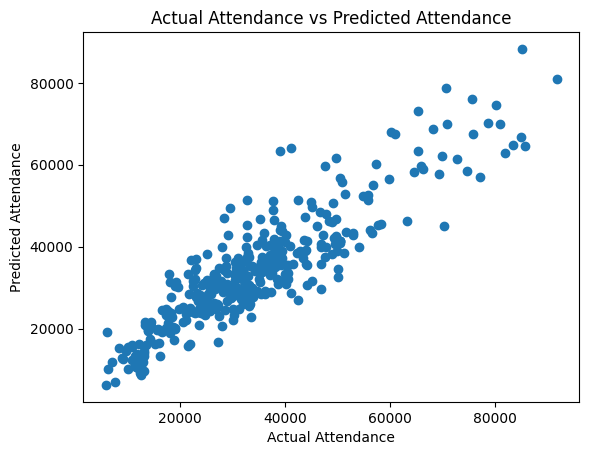

In [30]:
# Plot results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Attendance')
plt.ylabel('Predicted Attendance')
plt.title('Actual Attendance vs Predicted Attendance')
plt.show()


Feature: 0, Score: 0.01651
Feature: 1, Score: 0.00664
Feature: 2, Score: 0.01534
Feature: 3, Score: 0.00340
Feature: 4, Score: 0.00335
Feature: 5, Score: 0.59218
Feature: 6, Score: 0.07765
Feature: 7, Score: 0.08881
Feature: 8, Score: 0.07591
Feature: 9, Score: 0.03336
Feature: 10, Score: 0.00732
Feature: 11, Score: 0.01584
Feature: 12, Score: 0.03612
Feature: 13, Score: 0.02758


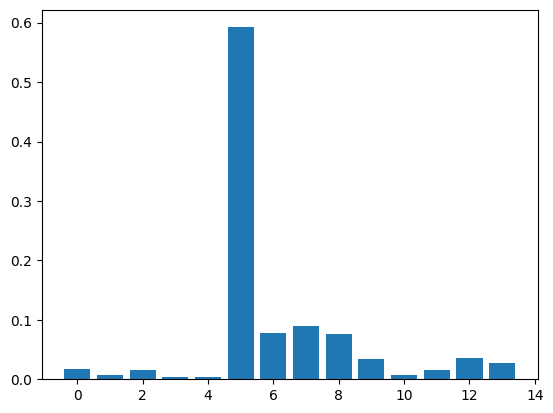

In [31]:
#plot feature importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Cat Boosting

In [54]:
from catboost import CatBoostRegressor

In [55]:
mainDF = pd.read_csv('proCatH&AData.csv')
mainDF.columns.tolist()
#drop null values
mainDF = mainDF.dropna()

In [56]:
cbr = CatBoostRegressor(loss_function='Logloss', random_state=42)

In [ ]:
# Define the parameter distributions for Random Search
param_dist = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'depth': [3, 6]
}

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring=scorer, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters for Random Search
print("Random Search - Best Hyperparameters:", random_search.best_params_)

In [57]:
X = mainDF[['Year', 'Round', 'MaxTemp', 'MinTemp', 'Rainfall', 'Venue', 'HomeTeam', 'AwayTeam', 'Day', 'homePosition', 'homePoints', 'StartTime','homePercentage', 'awayPosition']]
Y = mainDF['Attendance']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=42)

In [59]:

# Specify the categorical features
categorical_features = ['Venue', 'HomeTeam', 'AwayTeam', 'Day', 'StartTime']

cbr.fit(X_train, y_train, cat_features=categorical_features)


In [60]:
y_pred = cbr.predict(X_test)

In [61]:

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 137555849.3006173
Mean Absolute Error: 8944.290203286557
R-squared: 0.5528535389588813


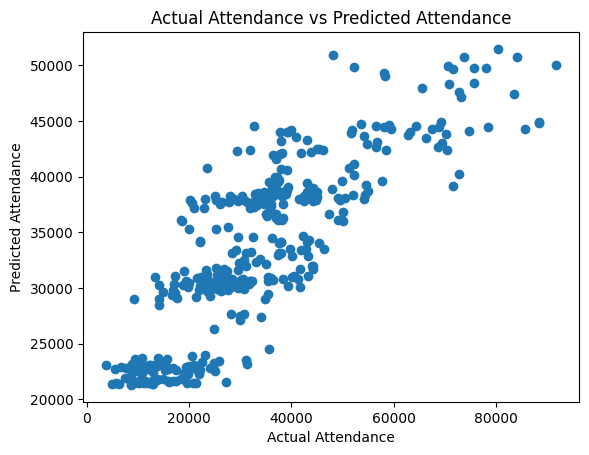

In [62]:
# Plot results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Attendance')
plt.ylabel('Predicted Attendance')
plt.title('Actual Attendance vs Predicted Attendance')
plt.show()
